# Forest Cover Type Classification
Este notebook contiene el análisis y entrenamiento de modelos de clasificación para el dataset de tipos de cobertura forestal.

In [2]:
import pandas as pd

df = pd.read_csv("dataset/train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## 1️⃣ Exploración de datos (EDA)
En esta sección, analizamos la estructura del dataset, estadísticas descriptivas y visualizamos la distribución de las variables.

In [3]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.isnull().sum()


Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


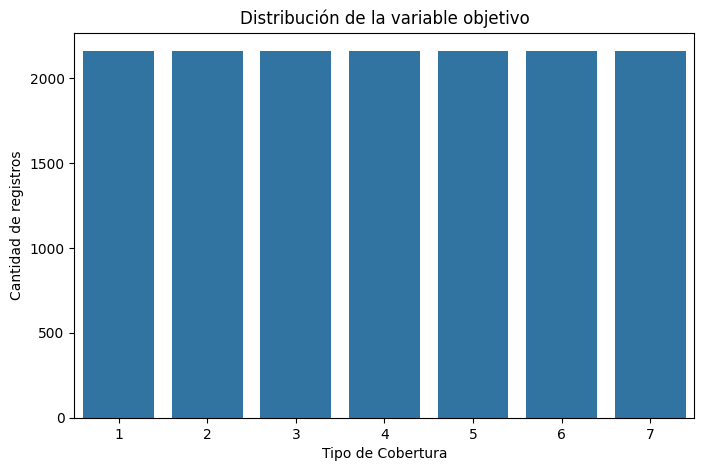

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df["Cover_Type"])
plt.xlabel("Tipo de Cobertura")
plt.ylabel("Cantidad de registros")
plt.title("Distribución de la variable objetivo")
plt.show()


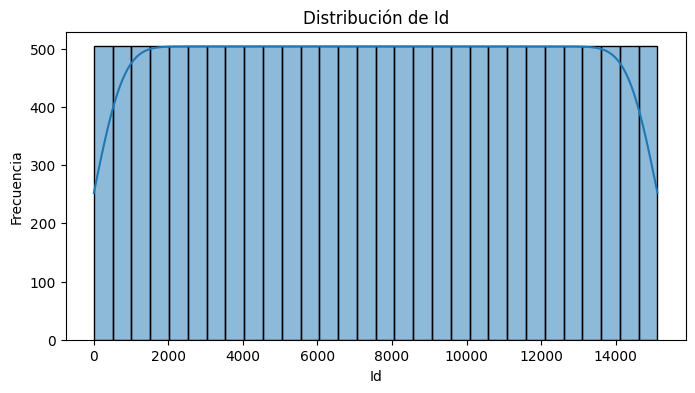

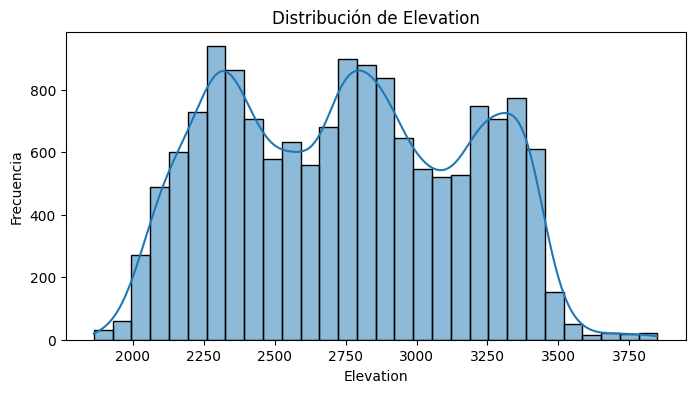

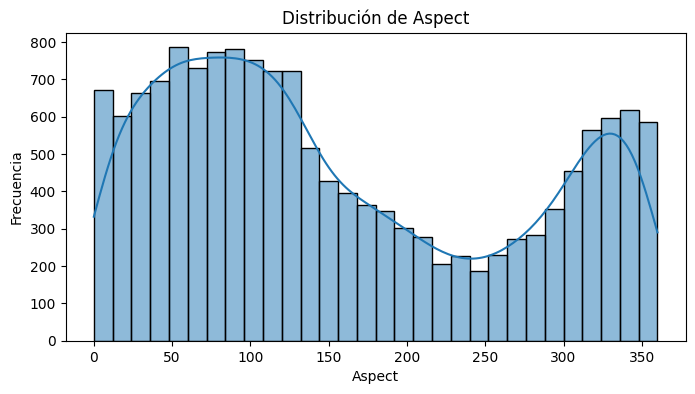

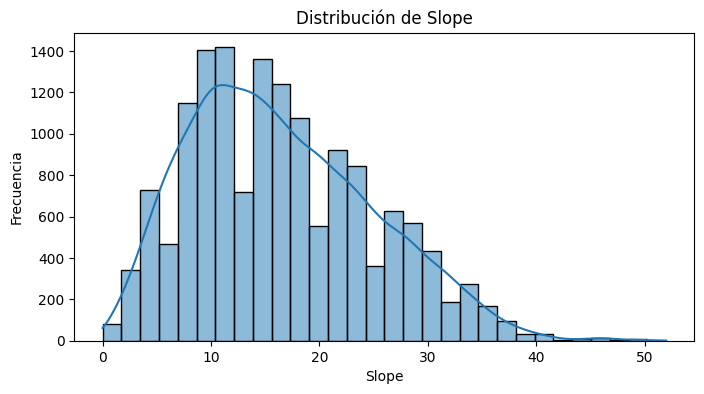

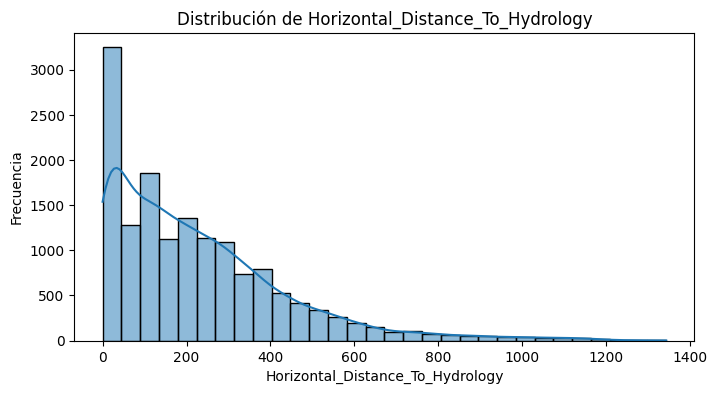

In [8]:
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in variables_numericas[:5]:  # ejemplo con las primeras 5 variables
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


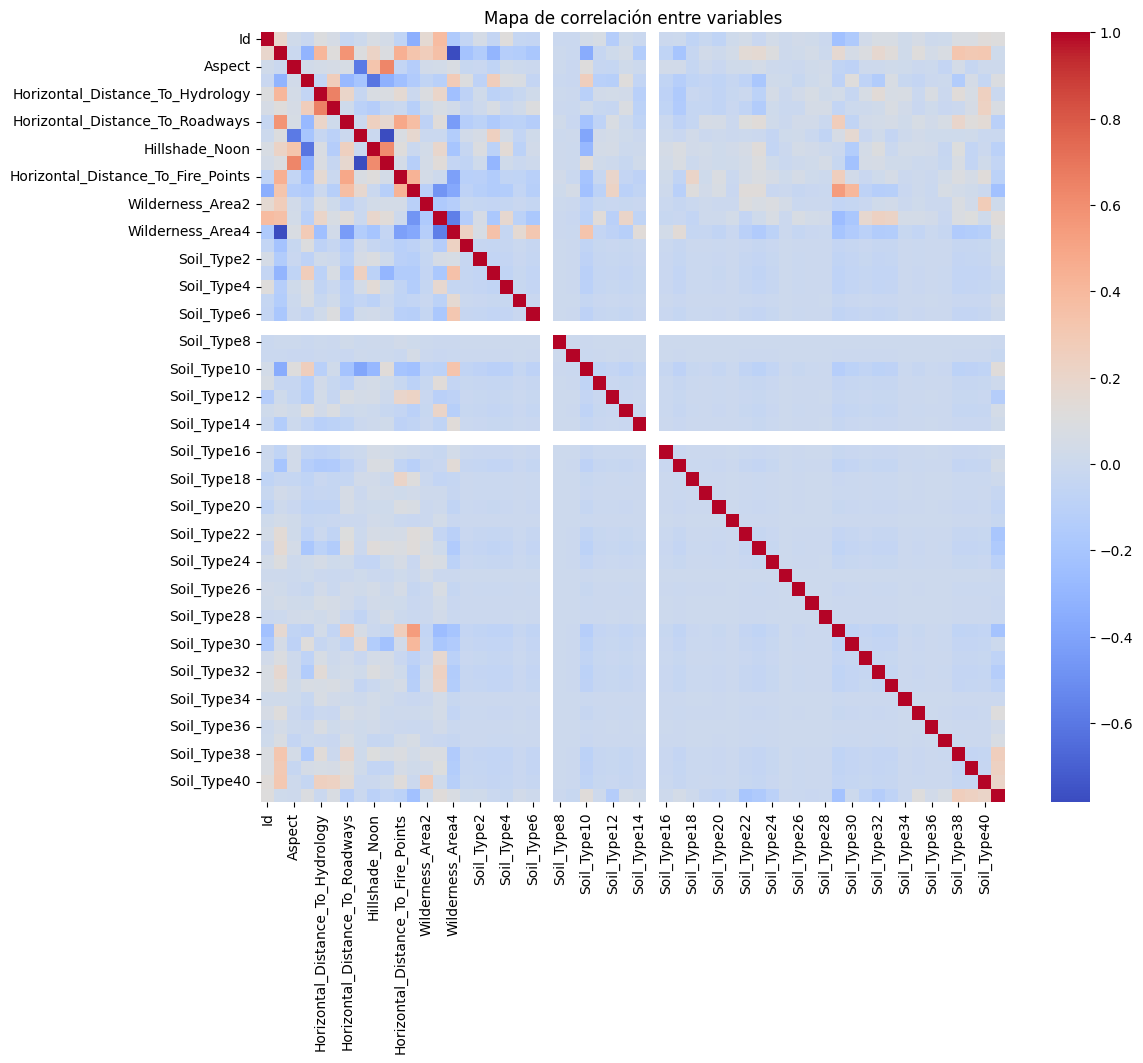

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de correlación entre variables')
plt.show()

## 2️⃣ Preparación de datos
Se divide el dataset en entrenamiento y prueba, se ajustan las clases para que comiencen desde 0 y se normalizan las variables.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar variables independientes y objetivo
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Ajustar clases para que comiencen desde 0
y = y - 1

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 3️⃣ Entrenamiento del Modelo 1: Árbol de Decisión
Entrenamos un Árbol de Decisión como primer modelo de clasificación.


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)

y_pred_dt = modelo_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}")


Decision Tree - Accuracy: 0.7917, Precision: 0.7900, Recall: 0.7917, F1-Score: 0.7907


## 4️⃣ Entrenamiento del Modelo 2: Random Forest
Entrenamos un modelo Random Forest para comparar su desempeño con el Árbol de Decisión.


In [24]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}")


Random Forest - Accuracy: 0.8598, Precision: 0.8571, Recall: 0.8598, F1-Score: 0.8571


## 5️⃣ Entrenamiento del Modelo 3: XGBoost
Entrenamos un modelo XGBoost y comparamos su rendimiento con los modelos anteriores.


In [25]:
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
modelo_xgb.fit(X_train, y_train)

y_pred_xgb = modelo_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-Score: {f1_xgb:.4f}")


c:\Users\jpere\OneDrive\Documentos\ESPECIALIZACION INTELIGENCIA ARTIFICIAL\DESARROLLO DE PROYECTOS DE INTELIGENCIA ARTIFICIAL\MonitoreoProyectosML_IA\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.8743, Precision: 0.8721, Recall: 0.8743, F1-Score: 0.8723


## 6️⃣ Gráfica de la función de costo
Visualizamos la evolución de la función de costo (Log Loss) en cada época del entrenamiento de XGBoost.


c:\Users\jpere\OneDrive\Documentos\ESPECIALIZACION INTELIGENCIA ARTIFICIAL\DESARROLLO DE PROYECTOS DE INTELIGENCIA ARTIFICIAL\MonitoreoProyectosML_IA\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


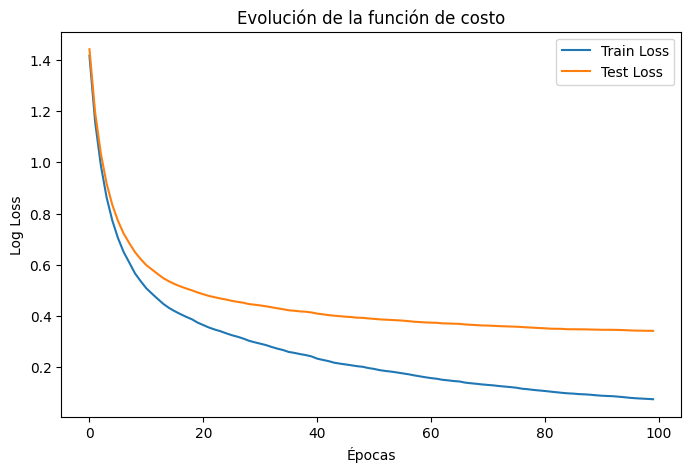

In [26]:
# Definir conjuntos de evaluación
eval_set = [(X_train, y_train), (X_test, y_test)]

# Entrenar modelo con monitoreo de pérdida
modelo_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Obtener métricas de pérdida
results = modelo_xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])

# Graficar función de costo
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), results['validation_0']['mlogloss'], label='Train Loss')
plt.plot(range(epochs), results['validation_1']['mlogloss'], label='Test Loss')
plt.xlabel('Épocas')
plt.ylabel('Log Loss')
plt.title('Evolución de la función de costo')
plt.legend()
plt.show()


## 7️⃣ Registro de Modelos en MLflow
Registramos el rendimiento de los modelos en MLflow para monitorear sus métricas.


In [27]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Forest Cover Classification")

with mlflow.start_run():
    # Log de hiperparámetros
    mlflow.log_param("Model", "XGBoost")
    
    # Log de métricas
    mlflow.log_metric("Accuracy", accuracy_xgb)
    mlflow.log_metric("Precision", precision_xgb)
    mlflow.log_metric("Recall", recall_xgb)
    mlflow.log_metric("F1-Score", f1_xgb)
    
    # Guardar modelo
    mlflow.sklearn.log_model(modelo_xgb, "model")
    
print("Modelo XGBoost registrado en MLflow")


2025/03/07 14:41:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo XGBoost registrado en MLflow
